In [1]:
import tensorflow as tf
import tensorflow_nufft as tfft

In [20]:
import dlex
import numpy as np
traj = dlex.ops.radial_trajectory(dict(base_resolution=256), views=256, spacing='linear') * 2.0 * np.pi
traj = traj[..., :2]
traj = tf.reshape(traj, [-1, 2])
traj.shape

TensorShape([131072, 2])

In [6]:
import skimage.data
import skimage.transform

image = skimage.transform.resize(
    skimage.data.shepp_logan_phantom(), (256, 256))


In [13]:
import tensorflow as tf
tf.reduce_max(traj)

<tf.Tensor: shape=(), dtype=float32, numpy=3.1415927>

In [21]:
# i2k
kspace = tfft.nufft(image, traj, transform_type='type_2', j_sign='negative')

TensorShape([131072])

In [24]:
# k2i
recon = tfft.nufft(kspace, traj, transform_type='type_1', j_sign='positive', grid_shape=[256, 256])

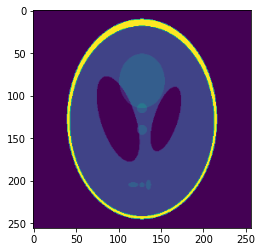

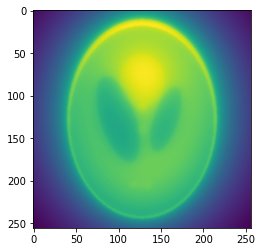

In [26]:
import matplotlib.pyplot as plt

plt.imshow(image)
plt.show()

plt.imshow(tf.abs(recon))
plt.show()